# Importación de datos en Python
## Los básicos:

En este bloc nos concentraremos en la importación de datos.  Cubriremos distintos tipos de archivo, comunes, y trabajaremos desde las bases.

In [1]:
import this
# ver el aforismo 5

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Usando `open`

In [2]:
dracula = open("../Datos/dracula_pi1.txt", 'r')
print(dracula.read())

JONATHAN HARKER'S JOURNAL

3 May. Bistritz._--Left Munich at 8:35 P. M., on 1st May, arriving at
Vienna early next morning; should have arrived at 6:46, but train was an
hour late. Buda-Pesth seems a wonderful place, from the glimpse which I
got of it from the train and the little I could walk through the
streets. I feared to go very far from the station, as we had arrived
late and would start as near the correct time as possible. The
impression I had was that we were leaving the West and entering the
East; the most western of splendid bridges over the Danube, which is
here of noble width and depth, took us among the traditions of Turkish
rule.


Algunos modos útiles para la función `open`son los siguientes:

  * r: Solo lectura (read only) y es el modo por defecto.
  * r+: Abre el archivo para lectura y escritura situando el apuntador al principio del archivo.
  * w:  Modo de escritura. El apuntador se coloca al inicio del archivo y sobreescribe cualquier archivo con el mismo nombre creando uno nuevo en caso de no existir.
  * w+: Abre el archivo para escritura y lectura.
  * a: Abre el archivo para añadir información. El cursor se sitúa al final del archivo y si no existe el archivo se crea uno.
  * a+: Abre el archivo para añadir datos y para leer.
  * a+: Opens a file for both appending and reading.
  
Los métodos disponibles son:
  * `read()`: que lee todo el archivo.  Puede necesitar que se especifique `encoding = 'utf8'` o similar en caso de contener caracteres especiales
  * `readline()`: lee una línea a la vez
  * `readlines()`: lee todas las líneas.  Es una función de apoyo para `read()`que es más eficiente.

Habiendo abierto un archivo es necesario cerrarlo:

In [ ]:
print(dracula.closed)
dracula.close()
print(dracula.closed)

### Usando with...en vez de open

In [3]:
with open("../Datos/dracula_pi1.txt") as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())
    print(file.readline())

JONATHAN HARKER'S JOURNAL



3 May. Bistritz._--Left Munich at 8:35 P. M., on 1st May, arriving at

Vienna early next morning; should have arrived at 6:46, but train was an



### Usando open para archivos csv

El módulo `csv` nos premite cargar datos de un archivo con extensión `.csv` directamente. Por ejemplo, el archivo `baby_names.csv` contiene datos de diversos nombres por año, género, grupo racial, y edad en los Estados Unidos.  Para cargar estos datos usamos:
1. una conexión al archivo con `open` en modo de lectura, `'r'`
2. el método `.reader()` para acceder a cada renglón del archivo
3. el método `.close()` para cerrar la conexión

```python
import csv
csv_file = open('../Datos/baby_names.csv', 'r')
for row in csv.reader(csv_file):
    print(row)  
csv_file.close()
```
Obsérvese que cada renglón es una lista.  Para hacer con ella un diccionario de los rankings haríamos uso del método `DictReader` como sigue:

```python
import csv
nombres_babe = {}
csv_file = open('../Datos/baby_names.csv', 'r')

for row in csv.DictReader(csvfile):
    # Puedes imprimir cada renglón 
    # print(row)
    # Añadimos "rank" y "name" al diccionario "nombres_bebe"
    nombres_bebe[row['RANK']] = row['NAME']
   
nombres_bebe.keys()
csv_file.close()
```


In [ ]:
import csv
nombres_bebe = {}
csv_file = open('../Datos/baby_names.csv', 'r')

for row in csv.DictReader(csv_file):
    nombres_bebe[row['RANK']] = row['NAME']

[nombres_bebe[name] for name in sorted(nombres_bebe)]

### Usando numpy `loadtxt` para datos numéricos

Usemos los datos de babosas de mar (Nudibranchia). Citando de [la fuente de origen](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html):

> Each row represents a sample of water.  The first column contains the time the sample was collected (measured in minutes since the start > of high tide.)  The second number is the percentage of larvae that underwent metamorphosis (which is a function of their ability to
> detect the chemicals from the seaweed.) 
> Times with value 99 are the "negative control."

In [25]:
import numpy as np
import matplotlib.pyplot as plt
sea = np.loadtxt("../Datos/seaslug.txt", skiprows = 1)
print(sea[1:5])

[[9.90e+01 1.33e-01]
 [9.90e+01 6.70e-02]
 [9.90e+01 0.00e+00]
 [9.90e+01 0.00e+00]]


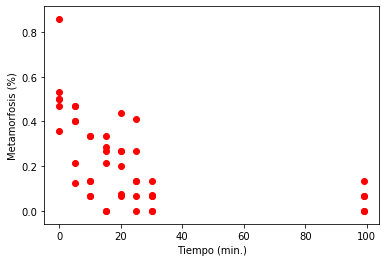

In [26]:
plt.scatter(sea[:, 0], sea[:, 1])
plt.xlabel('Tiempo (min.)')
plt.ylabel('Metamorfosis (%)')
plt.show()

## Tu turno

En [esta página](https://archive.ics.uci.edu/ml/datasets/Wine) podrás encontrar datos sobre el análisis químico de 178 vinos producidos en la misma región de Italia y con tres varietales. Los datos contienen 13 variables distintas. Utiliza directamente el link de la descarga para importar la base de datos `wine.dat` en el objeto `wine`. Mira el archivo para decidir si tienes que usar el argumento `delimiter` o el agrumento `skiprows`.  Revisa sus dimensiones con `wine.shape`.

Haz un gráfico de dispersión en el que se relacione el Ácido Málico (eje x) con la intensidad de color (eje Y).  Usa el varietal para colorear los puntos de tu gráfico.  Añade títulos a cada eje y al gráfico en sí.


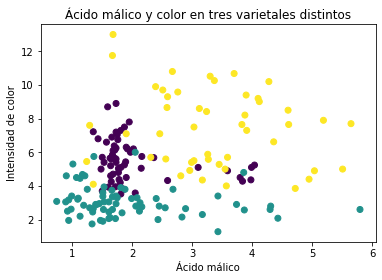

In [33]:
import numpy as np
import matplotlib.pyplot as plt 
wine = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", delimiter = ",")

plt.scatter(wine[:, 2], wine[:, 10], c = wine[:, 0])  #scatter = dispersión, x = [:, 2], y = [:, 2], color = [:, 0]
plt.xlabel("Ácido málico")
plt.ylabel("Intensidad de color")
plt.title('Ácido málico y color en tres varietales distintos')
plt.show()

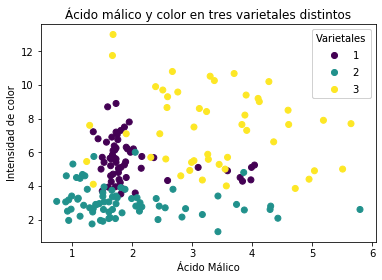

In [34]:
fig, ax = plt.subplots()
scatter = ax.scatter(wine[:, 2], wine[:, 10], c = wine[:, 0])
plt.xlabel('Ácido Málico')
plt.ylabel("Intensidad de color")
plt.title('Ácido málico y color en tres varietales distintos')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Varietales")
ax.add_artist(legend1)
plt.show()

## Otras fuentes, otros formatos

### 1. Excel: Módulo XlsxWriter

Comencemos por una fuente famosa: Excel. Utilizaremos **una modificación** de la base de datos de muertes en conflictos armados del Peace Research Institute Oslo (PRIO) [versión 3.1](https://www.prio.org/Data/Armed-Conflict/Battle-Deaths/The-Battle-Deaths-Dataset-version-30/).
Primero, haremos la _conexión_ y la lectura de una de las hojas del documento por nombre de Hoja.

In [1]:
import pandas as pd
xls_file = pd.ExcelFile("../Datos/PRIO_Modif Battle Deaths Dataset 3.1.xls") #es una conexión
print(xls_file.sheet_names) # estamos chismeando
data_1998 = xls_file.parse('1998') # estamos importando as such: esto es un DataFrame
data_1998.head(7)

['1998', '2000', '2005', '2008']


,id,year,bdeadlow,bdeadhig,bdeadbes,annualdata,source,bdversion,location,sidea,...,epend,ependdate,ependprec,gwnoa,gwnoa2nd,gwnob,gwnob2nd,gwnoloc,region,version
0,20,1998,300,999,-999,2,1,3.1,"India, Pakistan",India,...,0,NaT,NaN,750,NaN,770.0,NaN,"750, 770",3,2009-4
1,23,1998,25,999,-999,0,0,3.1,Myanmar,Myanmar,...,0,NaT,NaN,775,NaN,NaN,NaN,775,3,2009-4
2,29,1998,25,667,667,2,1,3.1,India,India,...,0,NaT,NaN,750,NaN,NaN,NaN,750,3,2009-4
3,67,1998,25,999,-999,0,0,3.1,Myanmar,Myanmar,...,0,NaT,NaN,775,NaN,NaN,NaN,775,3,2009-4
4,72,1998,118,302,250,2,1,3.1,Nepal,Nepal,...,0,NaT,NaN,790,NaN,NaN,NaN,790,3,2009-4
5,86,1998,1000,36250,36250,0,1,3.1,Democratic Republic of Congo (Zaire),Democratic Republic of Congo (Zaire),...,0,NaT,NaN,490,"540, 483, 565, 552",NaN,"517, 500",490,4,2009-4
6,90,1998,1000,2100,-999,2,1,3.1,Burundi,Burundi,...,0,NaT,NaN,516,NaN,NaN,NaN,516,4,2009-4


También es posible utilizar el _índice_ de la hoja:

In [74]:
data_1998_bis = xls_file.parse(0)
data_1998_bis.head(4)

,id,year,bdeadlow,bdeadhig,bdeadbes,annualdata,source,bdversion,location,sidea,...,epend,ependdate,ependprec,gwnoa,gwnoa2nd,gwnob,gwnob2nd,gwnoloc,region,version
0,20,1998,300,999,-999,2,1,3.1,"India, Pakistan",India,...,0,NaT,NaN,750,NaN,770.0,NaN,"750, 770",3,2009-4
1,23,1998,25,999,-999,0,0,3.1,Myanmar,Myanmar,...,0,NaT,NaN,775,NaN,NaN,NaN,775,3,2009-4
2,29,1998,25,667,667,2,1,3.1,India,India,...,0,NaT,NaN,750,NaN,NaN,NaN,750,3,2009-4
3,67,1998,25,999,-999,0,0,3.1,Myanmar,Myanmar,...,0,NaT,NaN,775,NaN,NaN,NaN,775,3,2009-4


## Tu turno
 
La columna `bdeadbes` contiene `el mejor estimador de las muertes por conflicto bélico` y la columna `location` indica en dónde ocurrieron las muertes.  Lee de nuevo el excel, esta vez la hoja correspondiente al año 2005, únicamente las columnas `year`, `bdeadbes`, y `location`.  Pon a estas columnas los nombres `Año`, `Muertes`, y `Sitio`. Consulta `help(pd.ExcelFile.parse)`

In [3]:
import pandas as pd

xls_file = pd.ExcelFile("../Datos/PRIO_Modif Battle Deaths Dataset 3.1.xls") #es una conexión

data_2005 = xls_file.parse("2005", usecols = [1, 4, 8], names = ["Año", "Muertes", "Sitio"])
data_2005.head()

,Año,Muertes,Sitio
0,2005,200,Philippines
1,2005,42,Myanmar
2,2005,892,India
3,2005,240,Israel
4,2005,99,India


Ahora, analiza `help(pd.read_excel)` para hacer la misma tarea (directamente con el archivo).

In [5]:
data_2005_bis = pd.read_excel("../Datos/PRIO_Modif Battle Deaths Dataset 3.1.xls", 
                              sheet_name = "2005", usecols = [1, 4, 8], names = ["Año", "Muertes", "Sitio"])
# help(pd.read_excel)
data_2005_bis.head()

,Año,Muertes,Sitio
0,2005,200,Philippines
1,2005,42,Myanmar
2,2005,892,India
3,2005,240,Israel
4,2005,99,India


Complementariamente, podemos escribir una base de datos desde `pandas` hacia excel como sigue: 

In [90]:
writer_98 = pd.ExcelWriter('../Productos/1998_simple.xlsx', engine='xlsxwriter')
data_1998.to_excel(writer_98, sheet_name = "Muertes 1998")
writer_98.save()

Pueden consultar más al respecto de este módulo en [la documentación oficial](https://xlsxwriter.readthedocs.io/working_with_pandas.html).

### 2. SAS: Módulo sas7bdat

Importar datos en formato `.sas7bdat`es muy sencillo. Para ilustrarlo, utilizaremos la base de datos `mroz.sas7bdat` adaptada por R. Carter, W. Griffiths, y G. Lim para su libro [Priciples of Econometrics](http://principlesofeconometrics.com/poe5/poe5.html).  Procedentes originalmente de la publicación

T.A. Mroz (1987), “The Sensitivity of an Empirical Model of Married Women’s Hours of Work to Economic and Statistical Assumptions”, Econometrica 55, 765-799,

son utilizados, entre otras, para analizar la relación entre el ingreso familiar disponible y la educación conjunta de los responsables de hogar.  Otra aplicación clásica es la dada por J. Wooldridge en su libro [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) para analizar los efectos de ser madre (de hijos pequeños) sobre la participación en el mercado laboral.

In [99]:
mroz_sas = pd.read_sas("../datos/mroz.sas7bdat")
mroz_sas.head()

,TAXABLEINC,FEDERALTAX,HSIBLINGS,HFATHEREDUC,HMOTHEREDUC,SIBLINGS,LFP,HOURS,KIDSL6,KIDS618,...,HAGE,HEDUC,HWAGE,FAMINC,MTR,MOTHEREDUC,FATHEREDUC,UNEMPLOYMENT,LARGECITY,EXPER
0,12200.0,1494.0,1.0,14.0,16.0,4.0,1.0,1610.0,1.0,0.0,...,34.0,12.0,4.0288,16310.0,0.7215,12.0,7.0,5.0,0.0,14.0
1,18000.0,2615.0,8.0,7.0,3.0,0.0,1.0,1656.0,0.0,2.0,...,30.0,9.0,8.4416,21800.0,0.6615,7.0,7.0,11.0,1.0,5.0
2,24000.0,3957.0,4.0,7.0,10.0,2.0,1.0,1980.0,1.0,3.0,...,40.0,12.0,3.5807,21040.0,0.6915,12.0,7.0,5.0,0.0,15.0
3,16400.0,2279.0,6.0,7.0,12.0,5.0,1.0,456.0,0.0,3.0,...,53.0,10.0,3.5417,7300.0,0.7815,7.0,7.0,5.0,0.0,6.0
4,10000.0,1063.0,3.0,7.0,7.0,7.0,1.0,1568.0,1.0,2.0,...,32.0,12.0,10.0000,27300.0,0.6215,12.0,14.0,9.5,1.0,7.0


Puede abundar sobre la interacción de Python y SAS en [esta página](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3260-2019.pdf).  Existen [otros formatos que `pandas` puede importar](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) como
  * STATA
  * SAS
  * JSON
  * HDF5
  * HTML (Si hay una tabla en la página, como en [esta](https://www.cbtnuggets.com/blog/technology/data/13-honest-data-center-technician-salaries-in-2018)).
  
Por su estructura tabular, es preferible importar direcamente a pandas, cuando esto es posible.